<h1>Bigmart - Predicting Sales of a Store</h1>

In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [360]:
data = pd.read_csv('bigmart/train.csv')

In [308]:
data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


<h2>Exploration of the dataset</h2>

In [30]:
def abs_bar_labels():
    plt.ylabel('Absolute Frequency')
    plt.xticks(rotation = 0)
    plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
    for x in ax.patches:
        ax.annotate(x.get_height(), 
        (x.get_x() + x.get_width()/2., x.get_height()), ha = 'center', va = 'center', xytext = (0, 7), 
        textcoords = 'offset points', fontsize = 12, color = 'black')

def rel_bar_labels():
    plt.ylabel('Relative Frequency (%)')
    plt.xticks(rotation = 0)
    plt.setp(ax1.get_xticklabels(), rotation=30, horizontalalignment='right')
    for x in ax1.patches:
        ax1.annotate(str(x.get_height()) + '%', 
        (x.get_x() + x.get_width()/2., x.get_height()), ha = 'center', va = 'center', xytext = (0, 7), 
        textcoords = 'offset points', fontsize = 12, color = 'black')
        
def item_count(var, graph):
    global ax, ax1
    
    abs_freq = var.value_counts()
    rel_freq = round(var.value_counts(normalize = True)*100, 2)
    abs_rel = pd.DataFrame({'absolute': abs_freq, 'relative (%)': rel_freq})    
    
    display(abs_rel)
    
    if graph:
        ax = abs_freq.plot.bar()
        plt.title('Absolute Frequency of %s' %var.name)
        abs_bar_labels()
        plt.show()

        ax1 = rel_freq.plot.bar()
        plt.title('Relative Frequency of %s' %var.name)
        rel_bar_labels()
        plt.show()
    

In [27]:
data['Item_Identifier'].count()

8523

,absolute,relative (%)
Low Fat,5089,59.71
Regular,2889,33.90
LF,316,3.71
reg,117,1.37
low fat,112,1.31


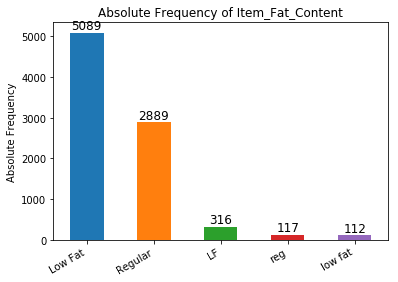

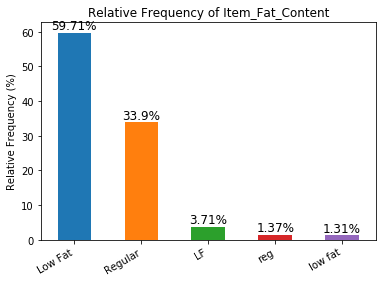

In [34]:
item_count(data['Item_Fat_Content'], True)

In [65]:
data['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [35]:
item_count(data['Item_Type'], False)

,absolute,relative (%)
Fruits and Vegetables,1232,14.46
Snack Foods,1200,14.08
Household,910,10.68
Frozen Foods,856,10.04
Dairy,682,8.00
Canned,649,7.61
Baking Goods,648,7.60
Health and Hygiene,520,6.10
Soft Drinks,445,5.22
Meat,425,4.99


,absolute,relative (%)
Medium,2793,45.69
Small,2388,39.06
High,932,15.25


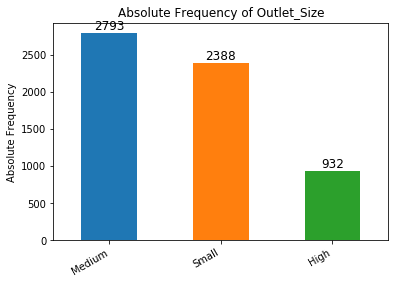

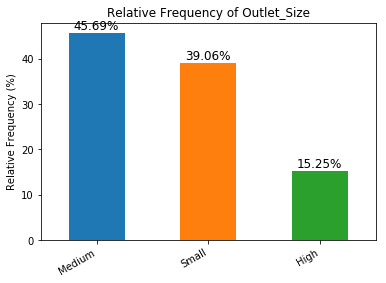

In [37]:
item_count(data['Outlet_Size'], True)

,absolute,relative (%)
Tier 3,3350,39.31
Tier 2,2785,32.68
Tier 1,2388,28.02


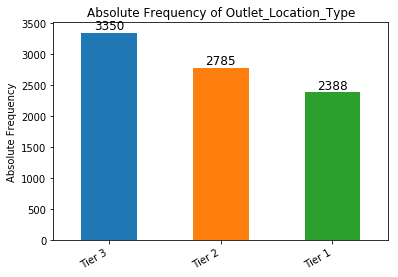

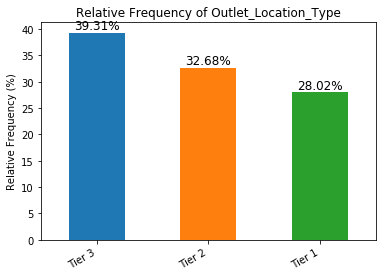

In [23]:
item_count(data['Outlet_Location_Type'])

,absolute,relative (%)
Supermarket Type1,5577,65.43
Grocery Store,1083,12.71
Supermarket Type3,935,10.97
Supermarket Type2,928,10.89


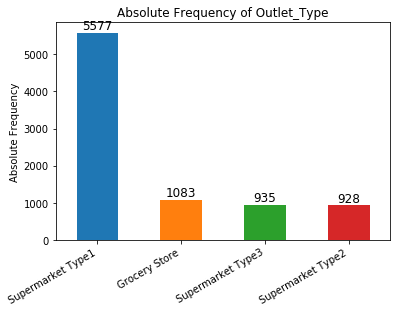

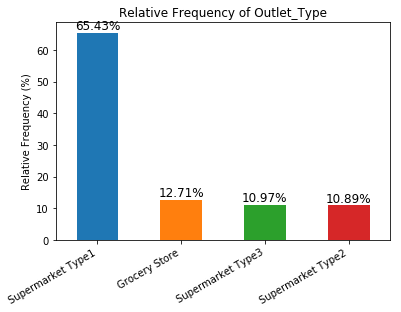

In [38]:
item_count(data['Outlet_Type'], True)

In [39]:
item_count(data['Outlet_Identifier'], False)

data['Outlet_Identifier'].count()

,absolute,relative (%)
OUT027,935,10.97
OUT013,932,10.94
OUT049,930,10.91
OUT035,930,10.91
OUT046,930,10.91
OUT045,929,10.90
OUT018,928,10.89
OUT017,926,10.86
OUT010,555,6.51
OUT019,528,6.20


8523

In [25]:
data['Item_MRP'].describe()

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

In [52]:
test_store = data[data['Outlet_Identifier'] == 'OUT027']

test_store.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
36,FDV20,NaN,Regular,0.059512,Fruits and Vegetables,128.0678,OUT027,1985,Medium,Tier 3,Supermarket Type3,2797.6916
38,FDX10,NaN,Regular,0.123111,Snack Foods,36.9874,OUT027,1985,Medium,Tier 3,Supermarket Type3,388.1614


In [66]:
data['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [57]:
arr = data['Outlet_Identifier'].unique()

for i in arr:
     display(data[data['Outlet_Identifier'] == i].iloc[0])

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

Item_Identifier                          FDA15
Item_Weight                                9.3
Item_Fat_Content                       Low Fat
Item_Visibility                      0.0160473
Item_Type                                Dairy
Item_MRP                               249.809
Outlet_Identifier                       OUT049
Outlet_Establishment_Year                 1999
Outlet_Size                             Medium
Outlet_Location_Type                    Tier 1
Outlet_Type                  Supermarket Type1
Item_Outlet_Sales                      3735.14
Name: 0, dtype: object

Item_Identifier                          DRC01
Item_Weight                               5.92
Item_Fat_Content                       Regular
Item_Visibility                      0.0192782
Item_Type                          Soft Drinks
Item_MRP                               48.2692
Outlet_Identifier                       OUT018
Outlet_Establishment_Year                 2009
Outlet_Size                             Medium
Outlet_Location_Type                    Tier 3
Outlet_Type                  Supermarket Type2
Item_Outlet_Sales                      443.423
Name: 1, dtype: object

Item_Identifier                              FDX07
Item_Weight                                   19.2
Item_Fat_Content                           Regular
Item_Visibility                                  0
Item_Type                    Fruits and Vegetables
Item_MRP                                   182.095
Outlet_Identifier                           OUT010
Outlet_Establishment_Year                     1998
Outlet_Size                                    NaN
Outlet_Location_Type                        Tier 3
Outlet_Type                          Grocery Store
Item_Outlet_Sales                           732.38
Name: 3, dtype: object

Item_Identifier                          NCD19
Item_Weight                               8.93
Item_Fat_Content                       Low Fat
Item_Visibility                              0
Item_Type                            Household
Item_MRP                               53.8614
Outlet_Identifier                       OUT013
Outlet_Establishment_Year                 1987
Outlet_Size                               High
Outlet_Location_Type                    Tier 3
Outlet_Type                  Supermarket Type1
Item_Outlet_Sales                      994.705
Name: 4, dtype: object

Item_Identifier                          FDP10
Item_Weight                                NaN
Item_Fat_Content                       Low Fat
Item_Visibility                        0.12747
Item_Type                          Snack Foods
Item_MRP                               107.762
Outlet_Identifier                       OUT027
Outlet_Establishment_Year                 1985
Outlet_Size                             Medium
Outlet_Location_Type                    Tier 3
Outlet_Type                  Supermarket Type3
Item_Outlet_Sales                      4022.76
Name: 7, dtype: object

Item_Identifier                          FDH17
Item_Weight                               16.2
Item_Fat_Content                       Regular
Item_Visibility                      0.0166871
Item_Type                         Frozen Foods
Item_MRP                               96.9726
Outlet_Identifier                       OUT045
Outlet_Establishment_Year                 2002
Outlet_Size                                NaN
Outlet_Location_Type                    Tier 2
Outlet_Type                  Supermarket Type1
Item_Outlet_Sales                       1076.6
Name: 8, dtype: object

Item_Identifier                          FDU28
Item_Weight                               19.2
Item_Fat_Content                       Regular
Item_Visibility                      0.0944496
Item_Type                         Frozen Foods
Item_MRP                               187.821
Outlet_Identifier                       OUT017
Outlet_Establishment_Year                 2007
Outlet_Size                                NaN
Outlet_Location_Type                    Tier 2
Outlet_Type                  Supermarket Type1
Item_Outlet_Sales                      4710.53
Name: 9, dtype: object

Item_Identifier                          FDA03
Item_Weight                               18.5
Item_Fat_Content                       Regular
Item_Visibility                      0.0454638
Item_Type                                Dairy
Item_MRP                                144.11
Outlet_Identifier                       OUT046
Outlet_Establishment_Year                 1997
Outlet_Size                              Small
Outlet_Location_Type                    Tier 1
Outlet_Type                  Supermarket Type1
Item_Outlet_Sales                      2187.15
Name: 11, dtype: object

Item_Identifier                          FDU02
Item_Weight                              13.35
Item_Fat_Content                       Low Fat
Item_Visibility                       0.102492
Item_Type                                Dairy
Item_MRP                               230.535
Outlet_Identifier                       OUT035
Outlet_Establishment_Year                 2004
Outlet_Size                              Small
Outlet_Location_Type                    Tier 2
Outlet_Type                  Supermarket Type1
Item_Outlet_Sales                      2748.42
Name: 19, dtype: object

Item_Identifier                      FDC37
Item_Weight                            NaN
Item_Fat_Content                   Low Fat
Item_Visibility                   0.057557
Item_Type                     Baking Goods
Item_MRP                           107.694
Outlet_Identifier                   OUT019
Outlet_Establishment_Year             1985
Outlet_Size                          Small
Outlet_Location_Type                Tier 1
Outlet_Type                  Grocery Store
Item_Outlet_Sales                  214.388
Name: 23, dtype: object

<h2>Important Findings</h2>
<br>
There are much more low fat items compared to regular items. In that column however there is a lack of consistency in terms of naming, example LF is the same as low fat. We will need to combine such values. For the category of items available, currently it does not add more value but maybe looking at their prices will shed some light on how they may impact final sale totals for stores. 

We also see that this dataset is made up of the sales across 10 stores. One issue about store factors is the size, we are missing 2401 entries here, specifically for store identifiers OUT010, OUT017 and OUT045. Looking at other data in those rows for example location type and outlet type, I would guess that those 3 would be in the small category of outlets but filling in 2401 entries with a guess does not seem too pleasant. I may leave this column out. 

Weight is missing 1463 entries, I can probably match the ones missing with items that have similar features or I could input those fields with the mean weights as to not change our data too much. 

In [64]:
columns = list(data.columns.values)

for i in columns:
    nulls = data[i].isnull().sum()
    print("There are ", nulls, " empty values in", i, "column")

There are  0  empty values in Item_Identifier column
There are  1463  empty values in Item_Weight column
There are  0  empty values in Item_Fat_Content column
There are  0  empty values in Item_Visibility column
There are  0  empty values in Item_Type column
There are  0  empty values in Item_MRP column
There are  0  empty values in Outlet_Identifier column
There are  0  empty values in Outlet_Establishment_Year column
There are  2410  empty values in Outlet_Size column
There are  0  empty values in Outlet_Location_Type column
There are  0  empty values in Outlet_Type column
There are  0  empty values in Item_Outlet_Sales column


<h2>Feature Corrections</h2>

In [325]:
data['Item_Fat_Content'].replace(['LF', 'low fat'], 'Low Fat', inplace=True)
data['Item_Fat_Content'].replace('reg', 'Regular', inplace=True)

In [326]:
item_count(data['Item_Fat_Content'], False)

,absolute,relative (%)
Low Fat,5517,64.73
Regular,3006,35.27


In [327]:
median_weight = data['Item_Weight'].median()

data['Item_Weight'].fillna(median_weight, inplace=True)

In [328]:
data = data.drop(columns='Outlet_Size')

display(data)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.600,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Tier 2,Supermarket Type1,4710.5350


In [329]:
columns = list(data.columns.values)

for i in columns:
    nulls = data[i].isnull().sum()
    print("There are ", nulls, " empty values in", i, "column")

There are  0  empty values in Item_Identifier column
There are  0  empty values in Item_Weight column
There are  0  empty values in Item_Fat_Content column
There are  0  empty values in Item_Visibility column
There are  0  empty values in Item_Type column
There are  0  empty values in Item_MRP column
There are  0  empty values in Outlet_Identifier column
There are  0  empty values in Outlet_Establishment_Year column
There are  0  empty values in Outlet_Location_Type column
There are  0  empty values in Outlet_Type column
There are  0  empty values in Item_Outlet_Sales column


Now we've cleaned our data, there are no more obvious mistakes in the set. We need to dive deeper into each feature to identify if any further changes are required. 

<h2>Bivariate Analysis</h2>

<h3>Visibility</h3>

In [330]:
grouped_visibility = data.groupby(['Outlet_Identifier'])['Item_Visibility'].sum()

display(grouped_visibility)

Outlet_Identifier
OUT010    56.308832
OUT013    55.879859
OUT017    56.834646
OUT018    56.621454
OUT019    57.257041
OUT027    54.804764
OUT035    56.974873
OUT045    56.180780
OUT046    56.231875
OUT049    56.549156
Name: Item_Visibility, dtype: float64

In [331]:
item_vis = data[data['Item_Visibility'] == 0]
print(item_vis.Outlet_Identifier.count())

item_vis.head(5)

526


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.0,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.0,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.0,Baking Goods,51.4008,OUT018,2009,Tier 3,Supermarket Type2,556.6088
10,FDY07,11.800,Low Fat,0.0,Fruits and Vegetables,45.5402,OUT049,1999,Tier 1,Supermarket Type1,1516.0266
32,FDP33,18.700,Low Fat,0.0,Snack Foods,256.6672,OUT018,2009,Tier 3,Supermarket Type2,3068.0064


In [332]:
visibility_median = data['Item_Visibility'].median()

data['Item_Visibility'].replace(0, visibility_median, inplace=True)

no_vis = data[data['Item_Visibility'] == 0].Outlet_Identifier.count()
print(no_vis)

0


As with most retail stores, product placement is quite important towards sales. The more an item is visible and available to a customer, the better its sales should be as it can lead to more impulse purchases (unplanned purchases). However, in our dataset, I noticed that the data provided by each outlet store does not add up to 100% visibility. This thus means that either certain items have not been included or the method of counting was incorrect. Luckily, they all seem to be within the same range, somewhere between 54% and 57% and as such should yield proper results. However, there are 526 rows with visibility as 0 but that produced sales but that is impossible! Thus, I filled those values with the median value of visiblity for completeness. 

<h2>Analysis of Sales</h2>

In [162]:
outlets = data.groupby(['Outlet_Identifier'])

In [163]:
outlet_sales = outlets['Item_Outlet_Sales'].sum()

outlet_sales = outlet_sales.sort_values(ascending=False)

display(outlet_sales)


Outlet_Identifier
OUT027    3.453926e+06
OUT035    2.268123e+06
OUT049    2.183970e+06
OUT017    2.167465e+06
OUT013    2.142664e+06
OUT046    2.118395e+06
OUT045    2.036725e+06
OUT018    1.851823e+06
OUT010    1.883402e+05
OUT019    1.796941e+05
Name: Item_Outlet_Sales, dtype: float64

<h2>Types of sales per outlet</h2>

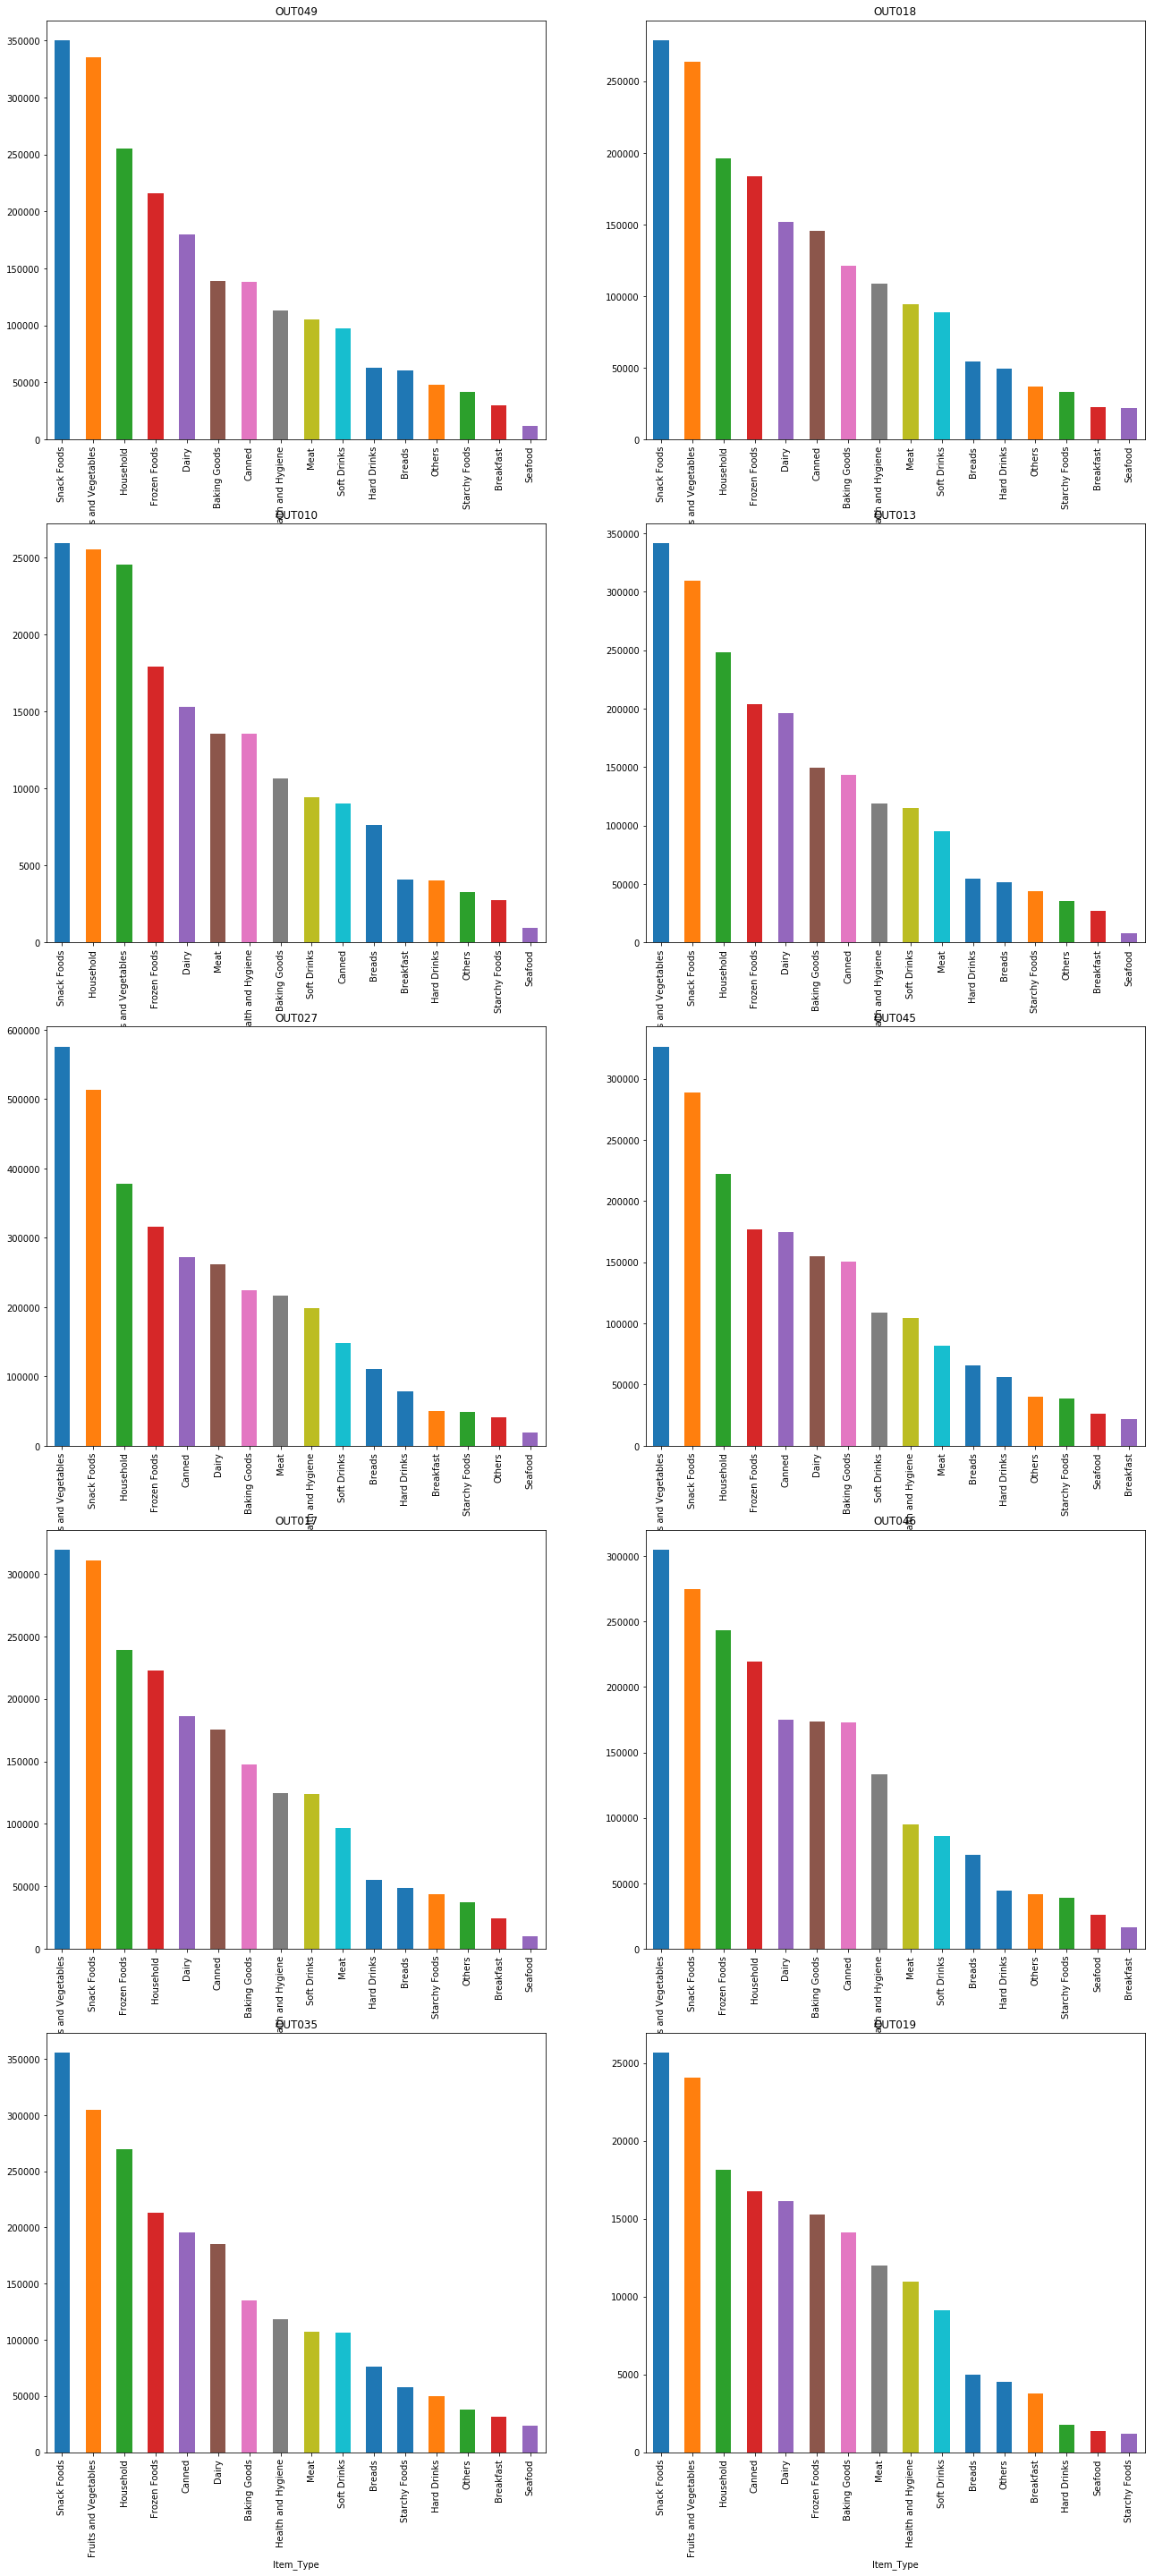

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [213]:
arr = data['Outlet_Identifier'].unique()

fig, axarr = plt.subplots(5,2, figsize=(22,50))

j = 0
k = -1
for i in arr:
    k += 1
    if k > 1:
        k = 0
        j += 1
    plt.figure()
    i_data = data[data['Outlet_Identifier'] == i]
    i_data = i_data.groupby(['Item_Type'])['Item_Outlet_Sales'].sum().sort_values(ascending=False)
    i_data.plot.bar(ax = axarr[j,k], title = i)
    

Through the plots above we can see that snack foods along with fruits and vegetables are the best sellers for outlets and seafood and breakfast typically the worst sellers. We can also see that OUT027 has significantly more volume sales over the rest, almost double for certain food types. This matches with our previous findings in which OUT027 leads all outlets in total sales. The other stores are within the 35k and lower range. 

In [214]:
data.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.138


In [221]:
store_type_sales = data.groupby(['Outlet_Location_Type'])['Item_Outlet_Sales']

display(store_type_sales.sum())

Outlet_Location_Type
Tier 1    4.482059e+06
Tier 2    6.472314e+06
Tier 3    7.636753e+06
Name: Item_Outlet_Sales, dtype: float64

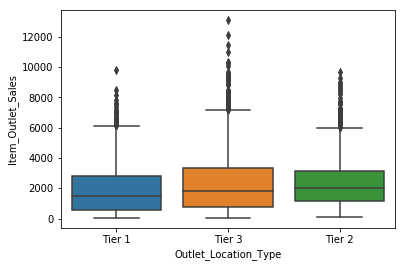

In [222]:
sns.boxplot(x=data['Outlet_Location_Type'], y=data['Item_Outlet_Sales'])

From the box plots, we notice that there are a number of entries that exceed the top whisker (maximum excluding outliers). As such, we will take a closer look at the outliers and see if we can find any patterns.

In [226]:
def search_outlier(tier):
    outlier_tier = data[(data['Outlet_Location_Type'] == tier)]
    q1 = outlier_tier['Item_Outlet_Sales'].quantile(0.25)
    q3 = outlier_tier['Item_Outlet_Sales'].quantile(0.75)
    iqr = q3 - q1
    u_fence = q3 + (iqr*1.5)
    l_fence = q1 - (iqr*1.5)
    
    outliers = outlier_tier[(outlier_tier['Item_Outlet_Sales'] < l_fence) |
                            (outlier_tier['Item_Outlet_Sales'] > u_fence)]
    
    return outliers


out = search_outlier("Tier 1")

out.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
145,FDP16,18.600,Low Fat,0.039356,Frozen Foods,246.3802,OUT049,1999,Tier 1,Supermarket Type1,7370.4060
424,NCU41,18.850,Low Fat,0.052136,Health and Hygiene,190.1846,OUT049,1999,Tier 1,Supermarket Type1,6687.9610
753,FDY26,20.600,Regular,0.030511,Dairy,211.4244,OUT046,1997,Tier 1,Supermarket Type1,7833.8028
903,FDX39,14.300,Regular,0.049753,Meat,210.3586,OUT049,1999,Tier 1,Supermarket Type1,6331.7580
915,DRE60,9.395,Low Fat,0.159582,Soft Drinks,224.7720,OUT049,1999,Tier 1,Supermarket Type1,7017.5320


In [227]:
out['Item_Identifier'].count()

36

In [228]:
out['Item_Type'].value_counts()

Fruits and Vegetables    6
Frozen Foods             5
Snack Foods              4
Health and Hygiene       4
Canned                   3
Household                3
Dairy                    2
Breads                   2
Soft Drinks              2
Hard Drinks              1
Seafood                  1
Starchy Foods            1
Meat                     1
Breakfast                1
Name: Item_Type, dtype: int64

In [231]:
out['Item_Outlet_Sales'].min()

6024.1584

In [236]:
out2 = search_outlier("Tier 2")

out2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
146,FDB11,16.000,Low Fat,0.060837,Starchy Foods,226.8404,OUT035,2004,Tier 2,Supermarket Type1,6301.1312
240,NCR38,17.250,Low Fat,0.113749,Household,251.3724,OUT045,2002,Tier 2,Supermarket Type1,6795.1548
243,FDY56,16.350,Regular,0.062764,Fruits and Vegetables,227.6062,OUT017,2007,Tier 2,Supermarket Type1,7222.5984
281,NCZ18,7.825,Low Fat,0.186033,Household,253.0698,OUT035,2004,Tier 2,Supermarket Type1,6088.0752
304,DRE60,9.395,Low Fat,0.159658,Soft Drinks,224.9720,OUT045,2002,Tier 2,Supermarket Type1,7696.6480


In [237]:
out2['Item_Identifier'].count()


70

In [238]:
out2['Item_Type'].value_counts()

Fruits and Vegetables    13
Snack Foods              12
Dairy                     9
Frozen Foods              8
Household                 6
Baking Goods              5
Soft Drinks               4
Starchy Foods             3
Health and Hygiene        3
Hard Drinks               2
Breads                    2
Canned                    2
Breakfast                 1
Name: Item_Type, dtype: int64

In [239]:
out2['Item_Outlet_Sales'].min()

6024.1584

In [240]:
out3 = search_outlier("Tier 3")

out3.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
130,FDY25,12.60,Low Fat,0.033810,Canned,180.5976,OUT027,1985,Tier 3,Supermarket Type3,7968.2944
275,FDH19,12.60,Low Fat,0.032928,Meat,173.1738,OUT027,1985,Tier 3,Supermarket Type3,7298.4996
276,FDY55,16.75,Low Fat,0.081253,Fruits and Vegetables,256.4988,OUT013,1987,Tier 3,Supermarket Type1,7452.9652
333,FDN58,12.60,Regular,0.056597,Snack Foods,230.9984,OUT027,1985,Tier 3,Supermarket Type3,9267.9360
456,FDS26,12.60,Low Fat,0.089036,Dairy,260.5594,OUT027,1985,Tier 3,Supermarket Type3,9158.0790


In [241]:
out3['Item_Identifier'].count()

70

In [242]:
out3['Item_Type'].value_counts()

Fruits and Vegetables    15
Snack Foods              13
Dairy                     9
Household                 8
Meat                      5
Frozen Foods              5
Soft Drinks               4
Canned                    3
Breakfast                 3
Baking Goods              2
Hard Drinks               1
Breads                    1
Starchy Foods             1
Name: Item_Type, dtype: int64

In [243]:
out3['Item_Outlet_Sales'].min()

7192.6374

Amongst all the outlier values, fruits and vegetables have the larger number of items as outliers with snack foods and frozens closely behind. This can be justified as fruits and vegetables are more commonly bought than other foods, especially since their shelf life is not very long. As such, this outlier value makes sense. I am surprised by how popular snack foods seem to be, considering that there are a significantly larger number of low fat foods for sale, snacks do very well. 

<h2>Outlet_Type</h2>

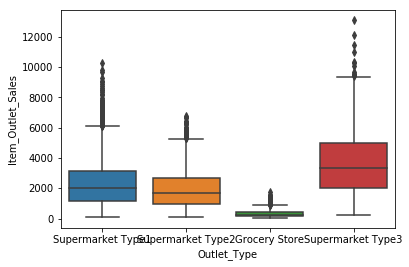

In [253]:
sns.boxplot(x=data['Outlet_Type'], y=data['Item_Outlet_Sales'])

In [256]:
def search_outlier_type(typ):
    outlier_type = data[(data['Outlet_Type'] == typ)]
    q1 = outlier_type['Item_Outlet_Sales'].quantile(0.25)
    q3 = outlier_type['Item_Outlet_Sales'].quantile(0.75)
    iqr = q3 - q1
    u_fence = q3 + (iqr*1.5)
    l_fence = q1 - (iqr*1.5)
    
    outliers = outlier_type[(outlier_type['Item_Outlet_Sales'] < l_fence) |
                            (outlier_type['Item_Outlet_Sales'] > u_fence)]
    
    return outliers

In [257]:
supermarket1 = search_outlier_type("Supermarket Type1")

supermarket1.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
145,FDP16,18.60,Low Fat,0.039356,Frozen Foods,246.3802,OUT049,1999,Tier 1,Supermarket Type1,7370.4060
146,FDB11,16.00,Low Fat,0.060837,Starchy Foods,226.8404,OUT035,2004,Tier 2,Supermarket Type1,6301.1312
240,NCR38,17.25,Low Fat,0.113749,Household,251.3724,OUT045,2002,Tier 2,Supermarket Type1,6795.1548
243,FDY56,16.35,Regular,0.062764,Fruits and Vegetables,227.6062,OUT017,2007,Tier 2,Supermarket Type1,7222.5984
276,FDY55,16.75,Low Fat,0.081253,Fruits and Vegetables,256.4988,OUT013,1987,Tier 3,Supermarket Type1,7452.9652


In [260]:
supermarket1['Item_Outlet_Sales'].count()

118

In [261]:
supermarket1['Item_Type'].value_counts()

Fruits and Vegetables    22
Snack Foods              17
Dairy                    13
Frozen Foods             13
Household                 9
Canned                    7
Soft Drinks               7
Health and Hygiene        7
Baking Goods              7
Hard Drinks               4
Breads                    4
Starchy Foods             4
Breakfast                 2
Seafood                   1
Meat                      1
Name: Item_Type, dtype: int64

In [262]:
supermarket2 = search_outlier_type("Supermarket Type2")

supermarket2.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
43,FDC02,21.350,Low Fat,0.069103,Canned,259.9278,OUT018,2009,Tier 3,Supermarket Type2,6768.5228
55,FDK21,7.905,Low Fat,0.010053,Snack Foods,249.0408,OUT018,2009,Tier 3,Supermarket Type2,6258.5200
423,FDA27,20.350,Regular,0.053931,Dairy,256.7672,OUT018,2009,Tier 3,Supermarket Type2,5624.6784
641,FDY51,12.500,Low Fat,0.081465,Meat,220.7798,OUT018,2009,Tier 3,Supermarket Type2,6611.3940
1103,DRF36,16.100,Low Fat,0.023673,Soft Drinks,189.0846,OUT018,2009,Tier 3,Supermarket Type2,5350.3688


In [263]:
supermarket2['Item_Outlet_Sales'].count()

33

In [264]:
supermarket2['Item_Type'].value_counts()

Fruits and Vegetables    5
Dairy                    3
Snack Foods              3
Frozen Foods             3
Household                3
Seafood                  2
Breads                   2
Canned                   2
Soft Drinks              2
Meat                     2
Health and Hygiene       2
Baking Goods             2
Others                   1
Breakfast                1
Name: Item_Type, dtype: int64

In [265]:
supermarket3 = search_outlier_type("Supermarket Type3")

supermarket3.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1009,FDU14,12.6,Low Fat,0.034584,Dairy,248.3750,OUT027,1985,Tier 3,Supermarket Type3,10236.6750
1450,FDZ20,12.6,Low Fat,0.053931,Fruits and Vegetables,253.0356,OUT027,1985,Tier 3,Supermarket Type3,11445.1020
3098,FDY02,12.6,Regular,0.087221,Dairy,263.9910,OUT027,1985,Tier 3,Supermarket Type3,9467.6760
4349,FDP33,12.6,Low Fat,0.088840,Snack Foods,254.2672,OUT027,1985,Tier 3,Supermarket Type3,10993.6896
5223,FDQ19,12.6,Regular,0.014296,Fruits and Vegetables,242.6512,OUT027,1985,Tier 3,Supermarket Type3,12117.5600


In [266]:
supermarket3['Item_Outlet_Sales'].count()

12

In [267]:
supermarket3['Item_Type'].value_counts()

Fruits and Vegetables    3
Dairy                    2
Household                2
Canned                   1
Soft Drinks              1
Snack Foods              1
Meat                     1
Frozen Foods             1
Name: Item_Type, dtype: int64

In [268]:
grocer = search_outlier_type("Grocery Store")

grocer.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
393,FDU02,12.60,Low Fat,0.179484,Dairy,228.9352,OUT019,1985,Tier 1,Grocery Store,916.1408
547,FDD29,12.15,Low Fat,0.030815,Frozen Foods,252.0698,OUT010,1998,Tier 3,Grocery Store,1014.6792
1088,FDL13,12.60,Regular,0.098607,Breakfast,232.7300,OUT019,1985,Tier 1,Grocery Store,932.1200
1120,NCX41,19.00,Low Fat,0.053931,Health and Hygiene,211.0244,OUT010,1998,Tier 3,Grocery Store,1482.0708
1380,FDJ55,12.80,Regular,0.039386,Meat,224.8404,OUT010,1998,Tier 3,Grocery Store,1575.2828


In [270]:
grocer['Item_Outlet_Sales'].count()

43

In [271]:
grocer['Item_Type'].value_counts()

Frozen Foods             7
Household                7
Snack Foods              6
Meat                     4
Canned                   3
Soft Drinks              3
Fruits and Vegetables    3
Dairy                    3
Health and Hygiene       3
Breads                   2
Breakfast                2
Name: Item_Type, dtype: int64

Supermarket Type3 performs very well considering it only accounts for 11% of all the types. That means its operations are superior as they have larger medians as opposed to the other 3. I expected Supermarket Type1 to perform stronger since it boasts the most percentage of stores (65%) but it seems that it performs just slightly better than Supermarket Type2. Grocery has the lowest which is expected since it is smaller than a supermarket. 

<h2>Finding strongest predictors for outlet sales</h2>

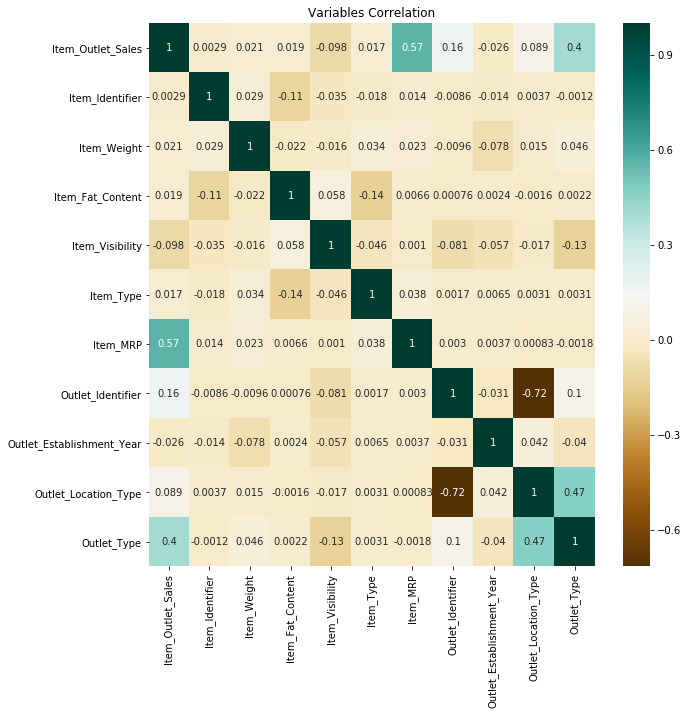

In [251]:
correlation = data.loc[:, :]

from sklearn.preprocessing import LabelEncoder
correlation = correlation.agg(LabelEncoder().fit_transform)
correlation['Item_Outlet_Sales'] = data.Item_Outlet_Sales 
correlation = correlation.set_index('Item_Outlet_Sales').reset_index()

fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches

'''Now create the heatmap correlation.'''
sns.heatmap(correlation.corr(), cmap ='BrBG', annot = True, ax=ax)
plt.title('Variables Correlation')
plt.show()






In [333]:
data = data.drop(columns='Item_Identifier', axis=1)

Based on the heatmap, it turns out item_mrp has the strongest correlation with 0.57. I had originally thought it would not be a significant predictor but I was proven wrong. Next time, I will look at the heatmap first to identify strong predictors instead of testing my own hypothesis. For example, I thought location_type would be significant since a store in a busy and large demographic area should perform strongly but the correlation is not even 1% in this dataset. 

Other strong predictors are outlet_type and outlet_identifier which we did exploratory work on and can see the relation with sales. Supermarket type 3 and OUT027 for example performed very well in comparison to the others. On the opposite end, groceries performed the worst most likely due to thier size disadvantage. 

<h1>Machine Learning</h2>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a214c0748>,
      dtype=object)

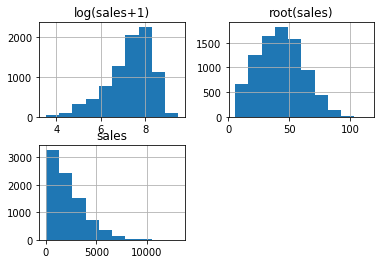

In [361]:
sales = pd.DataFrame({"sales":data['Item_Outlet_Sales'], "log(sales+1)":np.log1p(data['Item_Outlet_Sales']), "root(sales)":np.sqrt(data['Item_Outlet_Sales'])})

sales.hist()

I found that by applying a square root function over the values in data['Item_Outlet_Sales'], I was able to get the distribution of its values closer to that of a Gaussian Distribution. I wasn't sure if this would make an impact on our specific dataset so I tried using with and without the sqaure root application. Thus, I have split our data into 2 seperate sets to compare this difference. 

In [339]:
from sklearn.cross_validation import train_test_split

data1 = pd.get_dummies(data)

#splitting our data (without adjusting sales)
train, test = train_test_split(data1, test_size=0.2)

train_x = train.drop(columns='Item_Outlet_Sales', axis=1)
train_y = train.Item_Outlet_Sales

test_x = test.drop(columns='Item_Outlet_Sales', axis=1)
test_y = test.Item_Outlet_Sales

In [340]:
data2 = data

data2.Item_Outlet_Sales = np.sqrt(data['Item_Outlet_Sales'])

In [341]:
#splitting our data (with adjusting sales)
data_sqrt = pd.get_dummies(data2)

sqrt_train, sqrt_test = train_test_split(data_sqrt, test_size=0.2)

sqrt_train_x = sqrt_train.drop(columns='Item_Outlet_Sales', axis=1)
sqrt_train_y = sqrt_train.Item_Outlet_Sales

sqrt_test_x = sqrt_test.drop(columns='Item_Outlet_Sales', axis=1)
sqrt_test_y = sqrt_test.Item_Outlet_Sales

<h2>Linear Regression</h2>

In [320]:
from sklearn.model_selection import cross_val_score

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, train_x, train_y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, test_x, test_y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [321]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV

lr = LinearRegression()
lr.fit(train_x, train_y)

print("RMSE on Training set :", rmse_cv_train(lr).mean())
print("RMSE on Test set :", rmse_cv_test(lr).mean())

RMSE on Training set : 1131.7985178840693
RMSE on Test set : 1127.4608818299992


In [322]:
train_pred_y = lr.predict(train_x)
test_pred_y = lr.predict(test_x)

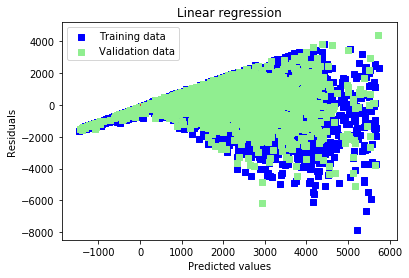

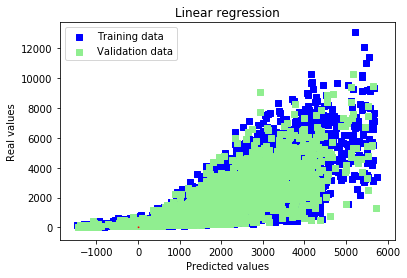

In [323]:
# Plot residuals
plt.scatter(train_pred_y, train_pred_y - train_y, c = "blue", marker = "s", label = "Training data")
plt.scatter(test_pred_y, test_pred_y - test_y, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(train_pred_y, train_y, c = "blue", marker = "s", label = "Training data")
plt.scatter(test_pred_y, test_y, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

Using the data without adjusting the sales, we see that our residuals are quite large. This means our model was not able to capture the data well. As for our real values vs predicted, we see that there's a trend going upwards almost like an exponential function. It may be better to transform our data with log to try and cancel this behaviour into a linear model. 

In [342]:
def sqrt_rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, sqrt_train_x, sqrt_train_y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

def sqrt_rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, sqrt_test_x, sqrt_test_y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [343]:
lr = LinearRegression()
lr.fit(sqrt_train_x, sqrt_train_y)

print("RMSE on Training set :", sqrt_rmse_cv_train(lr).mean())
print("RMSE on Test set :", sqrt_rmse_cv_test(lr).mean())

RMSE on Training set : 0.814220951185501
RMSE on Test set : 0.8154715667254573


In [344]:
sqrt_train_pred_y = lr.predict(sqrt_train_x)
sqrt_test_pred_y = lr.predict(sqrt_test_x)

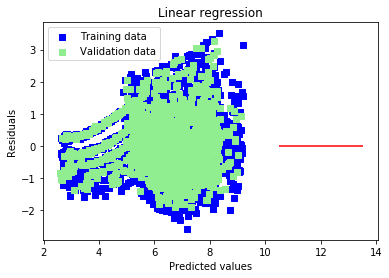

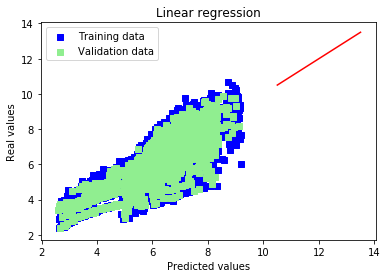

In [345]:
# Plot residuals
plt.scatter(sqrt_train_pred_y, sqrt_train_pred_y - sqrt_train_y, c = "blue", marker = "s", label = "Training data")
plt.scatter(sqrt_test_pred_y, sqrt_test_pred_y - sqrt_test_y, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(sqrt_train_pred_y, sqrt_train_y, c = "blue", marker = "s", label = "Training data")
plt.scatter(sqrt_test_pred_y, sqrt_test_y, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

Having applied the square root function over our outlet sales data, we notice that our RMSE falls considerably. Additionally, we notice that our residuals are closer to the center line indicating better capturing of our data. Moreover, as we predicted before, the real values and predicted values now follow a more linear model as opposed to the exponential before. As such, I can conclude that applying the square root over sales for normal distribution paid off and we will now use that data for our next models. 

<h2>Linear Regression with Ridge Regularization</h2>

In [347]:
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(sqrt_train_x, sqrt_train_y)
alpha = ridge.alpha_
print("Best alpha :", alpha)

Best alpha : 10.0


In [349]:
print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)
ridge.fit(sqrt_train_x, sqrt_train_y)
alpha = ridge.alpha_
print("Best alpha :", alpha)

Try again for more precision with alphas centered around 10.0
Best alpha : 14.0


In [350]:
print("Ridge RMSE on Training set :", sqrt_rmse_cv_train(ridge).mean())
print("Ridge RMSE on Test set :", sqrt_rmse_cv_test(ridge).mean())

Ridge RMSE on Training set : 0.8139358330365521
Ridge RMSE on Test set : 0.8142322366977954


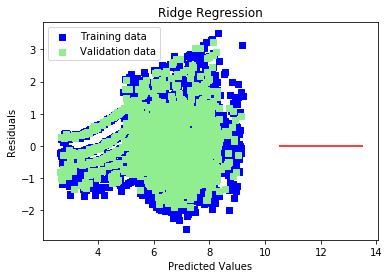

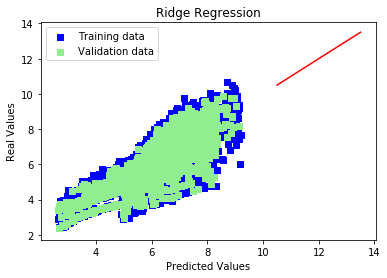

In [352]:
ridge_train_pred = ridge.predict(sqrt_train_x)
ridge_test_pred = ridge.predict(sqrt_test_x)

#plot residuals
plt.scatter(ridge_train_pred, ridge_train_pred - sqrt_train_y, c = "blue", marker = "s", label = "Training data")
plt.scatter(ridge_test_pred, ridge_test_pred - sqrt_test_y, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Ridge Regression")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

#plot Predictions
plt.scatter(ridge_train_pred, sqrt_train_y, c = "blue", marker = "s", label = "Training data")
plt.scatter(ridge_test_pred, sqrt_test_y, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Ridge Regression")
plt.xlabel("Predicted Values")
plt.ylabel("Real Values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

Ridge picked 39 features and eliminated the other 0 features


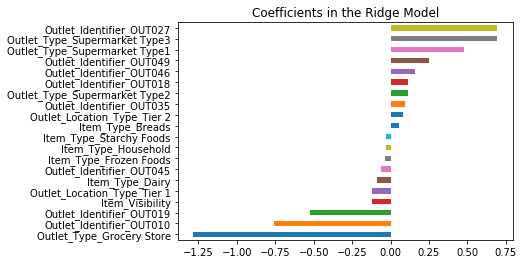

In [353]:
coefs = pd.Series(ridge.coef_, index = train_x.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()

Based on the coefficient chart, we see that outlet_identifier OUT027 and supermarket type3 which we saw generated the best results in terms of sales were given stronger coefficients. We also see that grocery store type was given the least as it consists of the fewest data points and its values are much lesser than the rest, the algorithm may have found that its values were lowering the predicted values and generating too much error. 

Additionally, we see that ridege regression did not perform much better than the linear regression model. This is probably due to the fact that our data is not too complex and thus there was not much regularization could do. The coefficients that the linear model gave were thus very accurate as to match the ridge regression results. 

<h2>Linear Regression with Lasso Regularization</h2>

In [356]:
lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1], 
                max_iter = 50000, cv = 10)
lasso.fit(sqrt_train_x, sqrt_train_y)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, 
                          alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05, 
                          alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, 
                          alpha * 1.4], 
                max_iter = 50000, cv = 10)
lasso.fit(sqrt_train_x, sqrt_train_y)
alpha = lasso.alpha_
print("Best alpha :", alpha)

Best alpha : 0.003
Try again for more precision with alphas centered around 0.003
Best alpha : 0.0019500000000000001


In [357]:
print("Lasso RMSE on Training set :", sqrt_rmse_cv_train(lasso).mean())
print("Lasso RMSE on Test set :", sqrt_rmse_cv_test(lasso).mean())

Lasso RMSE on Training set : 0.8129897650884775
Lasso RMSE on Test set : 0.8103189745514662


Lasso picked 21 features and eliminated the other 18 features


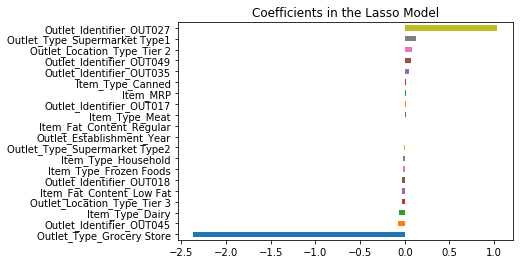

In [358]:
coefs = pd.Series(lasso.coef_, index = train_x.columns)
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

Lasso regularization also did not perform much better than our first linear model. However, I wanted to try using this in order to see which features it would value higher and which ones it would remove. As seen in the chart above, lasso kept a majority of the outlet_identifiers which makes sense since the outlet_identifier encompasses some of the other information such as location type which is almost all but gone. Also, interestingly Item_MRP does not have a large coefficient whereas in our heatmap before we saw that it was the variable that was dominantly correlated with sales. Finally, just like with the Ridge Model, we see that OUT027 and supermarket type1 have strongest predictor values and grocery store has an immense negative score since it skews the results with its small values. 

<h1>Conclusions</h1>

In conclusion, we notice that the linear models perform similarly with and without regularization. The strongest predictors in our set are the outlet_identifiers and outlet_type. 

Overall, this project was very informative. I was able to check all my hypothesis and learnt how to extract more information than meets the eye. Althought this dataset was fairly small, it was a good start. I would have liked to be able to feature engineer on this set but I did not think it was necessary due to the nature of the data. 

I will definately try to tackle a larger set next time, thanks for reading and hope you found this helpful!